# Data Scientist Assignment
For an average weight, we assume normal distributed size of the fish around this mean and the standard deviations given in Table 1 in the attached Excel file. For each month in a year, we have the number of individuals and the total biomass in a cage (Table 2).

A quick view of the datasets

In [1]:
# import libraries
import pandas as pd
from scipy.stats import norm
import scipy.integrate as integrate
from numpy import inf, sqrt, pi, exp
import matplotlib.pyplot as plt

In [2]:
# import data
distribution = pd.read_excel("Data_Scientist_assigment_Backround_data.xlsx", sheet_name = "Table 1")
monthly = pd.read_excel("Data_Scientist_assigment_Backround_data.xlsx", sheet_name = "Table 2")

In [3]:
distribution.head()

,Average weight,std (σ)
0,1.5,0.400
1,1.6,0.410
2,1.7,0.420
3,1.8,0.430
4,1.9,0.445


In [4]:
monthly.head()

,Unnamed: 0,Number of individuals,Biomass
0,Jan,156077,317895
1,Feb,153515,348611
2,Mar,149766,372454
3,Apr,143869,392922
4,May,135885,404041


In [5]:
# rename the unnamed column in monthly
monthly.rename(columns = {"Unnamed: 0": "month"}, inplace = True)
monthly.head()

,month,Number of individuals,Biomass
0,Jan,156077,317895
1,Feb,153515,348611
2,Mar,149766,372454
3,Apr,143869,392922
4,May,135885,404041


1. How would you go about calculating the total harvestable biomass (fish larger than 4kg) for these months?
- First, calculate the mean weight of fish for each month
- Second, get the corresponding distribution by looking the mean in *distribution*
- Third, calculate the total harvestable biomass for each month

In [6]:
# calculate mean weight for each month and add as a new colomn
monthly['Average weight'] = round(monthly["Biomass"] / monthly["Number of individuals"], 1)
monthly.head()

,month,Number of individuals,Biomass,Average weight
0,Jan,156077,317895,2.0
1,Feb,153515,348611,2.3
2,Mar,149766,372454,2.5
3,Apr,143869,392922,2.7
4,May,135885,404041,3.0


In [7]:
# turn the columns into the same number of decimal and data type
distribution['Average weight'] = round(distribution['Average weight'], 1).astype('float64')
monthly['Average weight'] = monthly['Average weight'].astype('float64')

# get the corresponding distribution as a new column
monthly_c = pd.merge(monthly, distribution, on = 'Average weight', how = 'left')
monthly_c

,month,Number of individuals,Biomass,Average weight,std (σ)
0,Jan,156077,317895,2.0,0.460
1,Feb,153515,348611,2.3,0.515
2,Mar,149766,372454,2.5,0.560
3,Apr,143869,392922,2.7,0.610
4,May,135885,404041,3.0,0.700
5,Jun,121411,381604,3.1,0.730
6,Jul,103747,348771,3.4,0.835
7,Aug,82179,296803,3.6,0.910
8,Sep,61159,237555,3.9,1.030
9,Oct,43519,178965,4.1,1.100


In [8]:
# calculate harvestable biomass for each month

# initialize output
harvest = []

# iterate over each month, and get the number of harvestable biomass
for i in range(len(monthly_c)):
    avg_weight = monthly_c.loc[i, 'Average weight']
    std = monthly_c.loc[i, "std (σ)"]
    bio = monthly_c.loc[i, "Biomass"]
    n = monthly_c.loc[i, "Number of individuals"]
    # integrate the function of normal distribution * x over 4 to inf
    result = integrate.quad(lambda x: x * n/(std * sqrt(2*pi)) * exp(-0.5*((x-avg_weight)/std)**2), 4, inf)
    harvest.append(result[0])

# append output list to dataframe
monthly_c["harvest"] = harvest
monthly_c

,month,Number of individuals,Biomass,Average weight,std (σ),harvest
0,Jan,156077,317895,2.0,0.460,4.395759
1,Feb,153515,348611,2.3,0.515,305.851015
2,Mar,149766,372454,2.5,0.560,2309.993913
3,Apr,143869,392922,2.7,0.610,10038.165951
4,May,135885,404041,3.0,0.700,44889.566328
5,Jun,121411,381604,3.1,0.730,57489.596158
6,Jul,103747,348771,3.4,0.835,110015.306557
7,Aug,82179,296803,3.6,0.910,124753.174596
8,Sep,61159,237555,3.9,1.030,135048.836025
9,Oct,43519,178965,4.1,1.100,114695.150551


<BarContainer object of 12 artists>

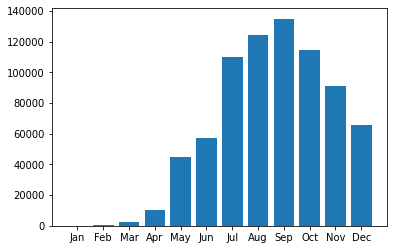

In [10]:
# visualization
plt.bar(monthly_c['month'], monthly_c['harvest'])

2. What is the average weight of these (harvestable) fish?
- First, get the cumulative distribution function, and this can give us the proportion of individuals lower than 4kg. Substract this from 1, we can get the proportion of individuals higher than 4kg
- Second, calculate the average weight

In [9]:
# initialize output
harvest_n = []

# interate over each month, get cumulative distribution function at 4.0kg
for i in range(len(monthly_c)):
    avg_weight = monthly_c.loc[i, 'Average weight']
    std = monthly_c.loc[i, "std (σ)"]
    n = monthly_c.loc[i, "Number of individuals"]
    cdf = norm(loc = avg_weight, scale = std).cdf(4)
    proportion = 1 - cdf
    hvst_n = n * proportion
    harvest_n.append(hvst_n)

# append output list to dataframe
monthly_c["harvest_n"] = harvest_n
monthly_c["harvest_avg"] = monthly_c["harvest"] / monthly_c["harvest_n"]
monthly_c

,month,Number of individuals,Biomass,Average weight,std (σ),harvest,harvest_n,harvest_avg
0,Jan,156077,317895,2.0,0.460,4.395759,1.072979,4.096780
1,Feb,153515,348611,2.3,0.515,305.851015,73.956530,4.135551
2,Mar,149766,372454,2.5,0.560,2309.993913,553.662141,4.172209
3,Apr,143869,392922,2.7,0.610,10038.165951,2379.376678,4.218822
4,May,135885,404041,3.0,0.700,44889.566328,10403.861841,4.314702
5,Jun,121411,381604,3.1,0.730,57489.596158,13210.838058,4.351699
6,Jul,103747,348771,3.4,0.835,110015.306557,24505.575445,4.489399
7,Aug,82179,296803,3.6,0.910,124753.174596,27129.568303,4.598421
8,Sep,61159,237555,3.9,1.030,135048.836025,28214.389851,4.786523
9,Oct,43519,178965,4.1,1.100,114695.150551,23335.653155,4.915018


(4.0, 5.5)

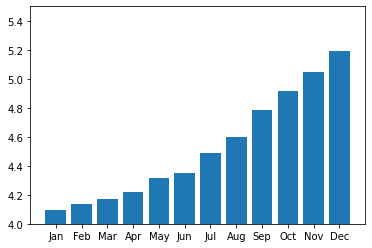

In [16]:
# visulization
plt.bar(monthly_c['month'], monthly_c['harvest_avg'])
plt.ylim(4, 5.5)

3. Assuming you only know the biomass and number of individuals at the start of the first month (from table 2). Assume a growth rate of 11,2%. How much will be harvested during the next 12 months, if we assume that all fish over 4kg will be harvested at the end of each month?

In [32]:
monthly = pd.read_excel("Data_Scientist_assigment_Backround_data.xlsx", sheet_name = "Table 2")
monthly.rename(columns = {"Unnamed: 0": "month"}, inplace = True)
monthly_new = monthly

# start from Feb, each month the growth rate of average weight is 11.2%
monthly_new.loc[0, 'Average weight'] = round(monthly_new.loc[0, "Biomass"] / monthly_new.loc[0, "Number of individuals"], 1)
for i in range(1, len(monthly_new)):   
    monthly_new.loc[i, 'Average weight'] = round(monthly_new.loc[i-1, 'Average weight'] * 1.112, 1)

# merge with distribution, get std
distribution['Average weight'] = round(distribution['Average weight'], 1).astype('float64')  
monthly_new['Average weight'] = monthly_new['Average weight'].astype('float64')

# get the corresponding distribution as a new column
monthly_newc = pd.merge(monthly_new, distribution, on = 'Average weight', how = 'left')
monthly_newc  # Number of individuals and Biomass haven't been corrected

,month,Number of individuals,Biomass,Average weight,std (σ)
0,Jan,156077,317895,2.0,0.460
1,Feb,153515,348611,2.2,0.495
2,Mar,149766,372454,2.4,0.535
3,Apr,143869,392922,2.7,0.610
4,May,135885,404041,3.0,0.700
5,Jun,121411,381604,3.3,0.800
6,Jul,103747,348771,3.7,0.950
7,Aug,82179,296803,4.1,1.100
8,Sep,61159,237555,4.6,1.255
9,Oct,43519,178965,5.1,1.355


In [33]:
# get the harvestable biomass and harvestable indivuduals for Jan

# initialize output
harvest = []
harvest_n = []

# harvestable biomass for Jan
avg_weight = monthly_newc.loc[0, 'Average weight']
std = monthly_newc.loc[0, "std (σ)"]
bio = monthly_newc.loc[0, "Biomass"]
n = monthly_newc.loc[0, "Number of individuals"]
result = integrate.quad(lambda x: x * n/(std * sqrt(2*pi)) * exp(-0.5*((x-avg_weight)/std)**2), 4, inf)
harvest.append(result[0])

# harvestable indivuduals for Jan
cdf = norm(loc = avg_weight, scale = std).cdf(4)
proportion = 1 - cdf
hvst_n = n * proportion
harvest_n.append(hvst_n)

print(harvest, harvest_n)

[4.395758819088859] [1.0729791092962002]


In [34]:
# interate over Feb to Dec, get harvestable biomass and harvestable indivuduals for each month
for i in range(1, len(monthly_newc)):
    
    avg_weight = monthly_newc.loc[i, 'Average weight']
    std = monthly_newc.loc[i, "std (σ)"]
    # number of remaining indivuals in the number of individuals minus the harvested individuals last month
    n = monthly_newc.loc[i-1, "Number of individuals"] - harvest_n[i-1]
    # multiply number of individuals with avg_weight to get total biomass
    bio = n * avg_weight
    monthly_newc.loc[i, "Number of individuals"] = n
    monthly_newc.loc[i, "Biomass"] = bio
    # get the biomass havestable
    result = integrate.quad(lambda x: x * n/(std * sqrt(2*pi)) * exp(-0.5*((x-avg_weight)/std)**2), 4, inf)
    harvest.append(result[0])
    
    # get the number of harvestable individuals
    cdf = norm(loc = avg_weight, scale = std).cdf(4)
    proportion = 1 - cdf
    hvst_n = n * proportion
    harvest_n.append(hvst_n)

monthly_newc["harvest_n"] = harvest_n
monthly_newc["harvest"] = harvest
monthly_newc["harvest_avg"] = monthly_newc["harvest"] / monthly_newc["harvest_n"]
monthly_newc

,month,Number of individuals,Biomass,Average weight,std (σ),harvest_n,harvest,harvest_avg
0,Jan,156077.000000,317895.000000,2.0,0.460,1.072979,4.395759,4.096780
1,Feb,156075.927021,343367.039446,2.2,0.495,21.578583,88.918891,4.120701
2,Mar,156054.348438,374530.436251,2.4,0.535,217.212464,901.825164,4.151811
3,Apr,155837.135974,420760.267130,2.7,0.610,2577.311630,10873.218221,4.218822
4,May,153259.824345,459779.473034,3.0,0.700,11734.143123,50629.333999,4.314702
5,Jun,141525.681222,467034.748032,3.3,0.800,27001.253471,119906.351634,4.440770
6,Jul,114524.427751,423740.382679,3.7,0.950,43070.478971,200653.847576,4.658733
7,Aug,71453.948780,292961.189997,4.1,1.100,38314.863975,188318.238303,4.915018
8,Sep,33139.084805,152439.790103,4.6,1.255,22657.394062,119024.003124,5.253208
9,Oct,10481.690743,53456.622789,5.1,1.355,8296.773172,46388.974990,5.591207


<BarContainer object of 12 artists>

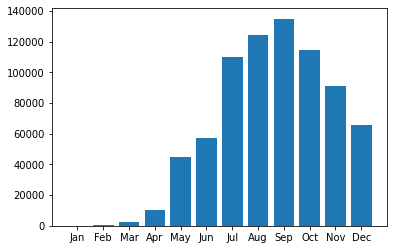

In [46]:
# visualization
plt.bar(monthly_newc['month'], monthly_c['harvest'])

In [39]:
print("Total havestable biomass is ", int(monthly_newc['harvest'].sum()), 'kg')

Total havestable biomass is  749850 kg
